In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf 


In [189]:
df_1 = pd.read_csv('product_data.csv', index_col='everyday', parse_dates=True)

In [190]:
df_1.head()

,productid,productname,quantity
everyday,,,
2023-08-16,D_10006,CURD - 200 G,60.0
2023-08-16,D_10029,STANDARDISED MILK - 500 ml,48.0
2023-08-16,D_10006,CURD - 200 G,60.0
2023-08-16,D_10017,DOUBLE TONED MILK - 500 ml,72.0
2023-08-16,D_10033,TONED MILK - 500 ml,24.0


In [191]:
# Filter for product ID D_10006
df_filtered = df_1[df_1['productid'] == 'D_10006']

In [192]:
print(df_filtered)

           productid   productname  quantity
everyday                                    
2023-08-16   D_10006  CURD - 200 G      60.0
2023-08-16   D_10006  CURD - 200 G      60.0
2023-08-16   D_10006  CURD - 200 G     180.0
2023-08-16   D_10006  CURD - 200 G     240.0
2023-08-16   D_10006  CURD - 200 G     120.0
...              ...           ...       ...
2023-02-28   D_10006  CURD - 200 G     720.0
2023-02-28   D_10006  CURD - 200 G     300.0
2023-02-28   D_10006  CURD - 200 G     120.0
2023-02-28   D_10006  CURD - 200 G    1260.0
2023-02-28   D_10006  CURD - 200 G     180.0

[16024 rows x 3 columns]


In [193]:
# Group by date and sum quantity, keeping 'quantity' column
df_grouped = df_filtered.groupby('everyday').agg({'quantity': 'sum'})

In [194]:
df_grouped.head

<bound method NDFrame.head of             quantity
everyday            
2022-10-01    8760.0
2022-10-02    9720.0
2022-10-03   11820.0
2022-10-04   12720.0
2022-10-05   11880.0
...              ...
2023-08-17    8580.0
2023-08-18    7380.0
2023-08-19    6720.0
2023-08-20    8100.0
2023-08-21    7860.0

[324 rows x 1 columns]>

In [195]:
df_grouped.shape

(324, 1)

In [196]:
# Check the data types of each column
print("\nData types:")
print(df_grouped.dtypes)


Data types:
quantity    float64
dtype: object


In [197]:
df_grouped['quantity'].resample(rule='A').std()

everyday
2022-12-31    1289.037464
2023-12-31    3528.006193
Freq: A-DEC, Name: quantity, dtype: float64

In [198]:
df_grouped['quantity'].resample('A').std()

everyday
2022-12-31    1289.037464
2023-12-31    3528.006193
Freq: A-DEC, Name: quantity, dtype: float64

<Axes: xlabel='everyday'>

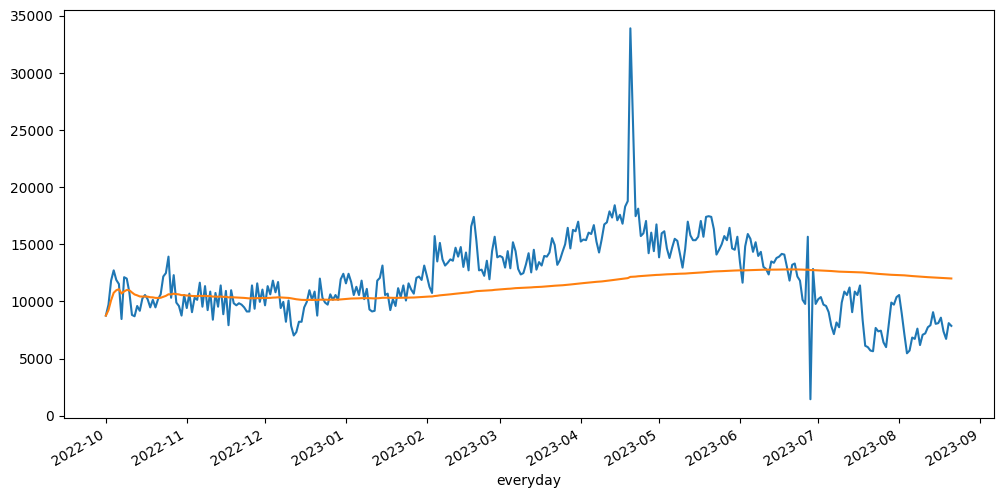

In [199]:
df_grouped['quantity'].plot(figsize=(12,6))
# df_grouped.rolling(window=7).mean()['quantity'].plot()
df_grouped['quantity'].expanding().mean().plot(figsize=(12,6))

In [200]:
pip install chart-studio

C:\Users\User\AppData\Local\Temp\ipykernel_7164\1484860873.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




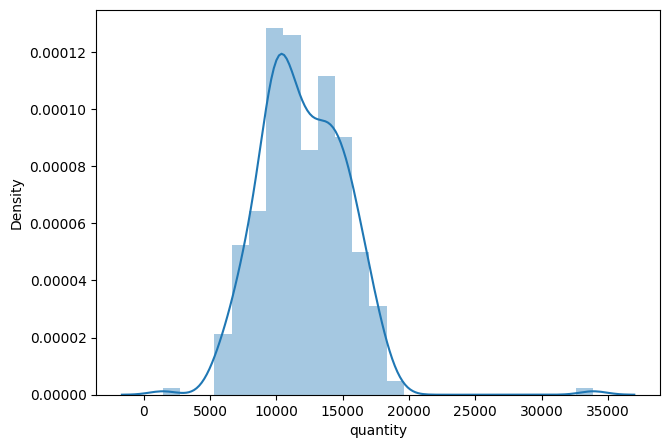

In [201]:
#detecting outlier in Quantity Columns Using Z Score Technique
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df_grouped['quantity'])
plt.show()

In [202]:
df_grouped['quantity'].skew()

0.8555494440417836

In [203]:
print("Mean vlaue of Quantity", df_grouped['quantity'].mean())
print("Std vlaue of Quantity", df_grouped['quantity'].std())
print("Min vlaue of Quantity", df_grouped['quantity'].min())
print("Max vlaue of Quantity", df_grouped['quantity'].max())

Mean vlaue of Quantity 12007.962962962964
Std vlaue of Quantity 3266.491786772356
Min vlaue of Quantity 1440.0
Max vlaue of Quantity 33900.0


In [204]:
new_df = df_grouped[(df_grouped['quantity'] < 21807.43) & (df_grouped['quantity'] > 2208.48)]
new_df

,quantity
everyday,
2022-10-01,8760.0
2022-10-02,9720.0
2022-10-03,11820.0
2022-10-04,12720.0
2022-10-05,11880.0
...,...
2023-08-17,8580.0
2023-08-18,7380.0
2023-08-19,6720.0


C:\Users\User\AppData\Local\Temp\ipykernel_7164\3982875508.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




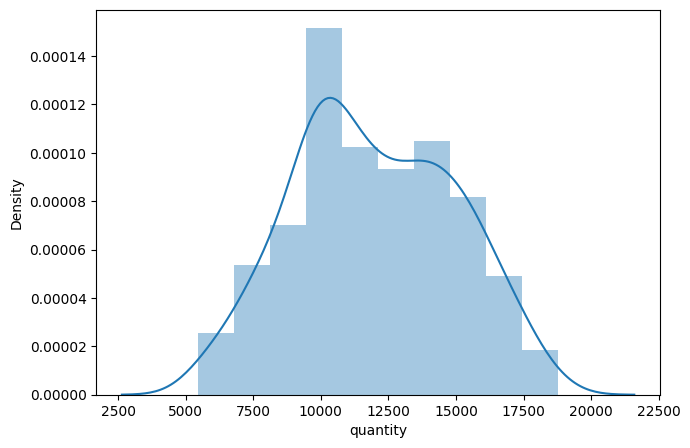

In [205]:
# Plot the time series data
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(new_df['quantity'])
plt.show()

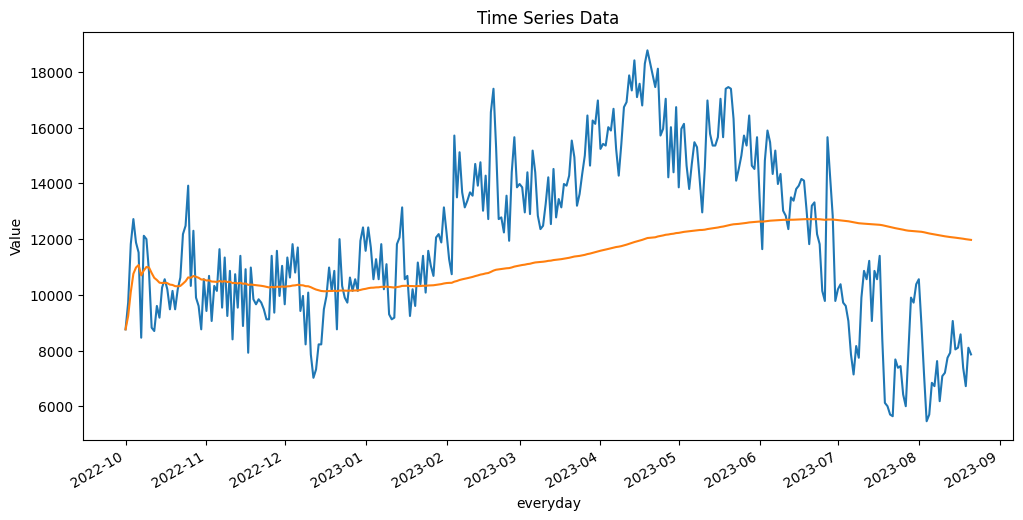

In [206]:
# Plot the time series data
plt.figure(figsize=(12, 4))
plt.plot(new_df['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
new_df['quantity'].expanding().mean().plot(figsize=(12,6))
plt.show()


Holt-Winters MModel with Training Data

In [207]:
df_2 = new_df.asfreq('d')

In [208]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2022-10-01 to 2023-08-21
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  322 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [287]:
train_df = df_2.iloc[:166]
test_df = df_2.iloc[166:]

In [288]:
train_df.info

<bound method DataFrame.info of             quantity
everyday            
2022-10-01    8760.0
2022-10-02    9720.0
2022-10-03   11820.0
2022-10-04   12720.0
2022-10-05   11880.0
...              ...
2023-03-11   13260.0
2023-03-12   14220.0
2023-03-13   12540.0
2023-03-14   14520.0
2023-03-15   12780.0

[166 rows x 1 columns]>

In [289]:
import statsmodels.api as sm

print(sm.__version__)

0.14.1


In [290]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<Axes: xlabel='everyday'>

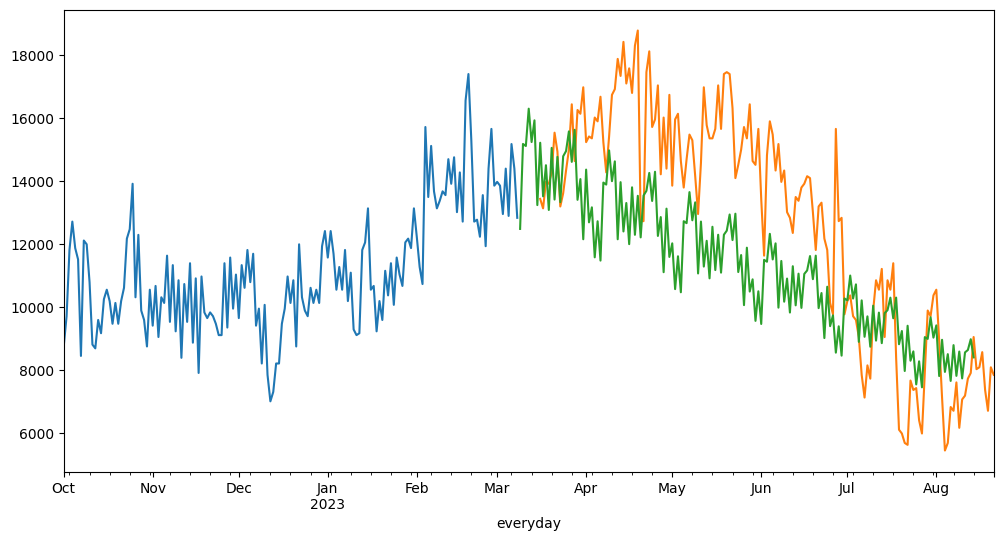

In [373]:
fit_model = ExponentialSmoothing(train_df['quantity'],
                                trend='add',
                                seasonal='mul',
                                seasonal_periods=28).fit()

prediction = fit_model.forecast(159)
train_df['quantity'].plot(figsize=(12,6))
test_df['quantity'].plot()
prediction.plot()

In [374]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [375]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_df['quantity'], prediction)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2306.507317808114


In [383]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import mean_absolute_error


def objective(params):
    # Fit the model with the current parameters
    model = ExponentialSmoothing(train_df['quantity'], 
                                  trend=params['trend'], 
                                  seasonal=params['seasonal'], 
                                  seasonal_periods=int(params['seasonal_periods'])).fit()
    
    # Generate predictions
    prediction = model.forecast(len(test_df['quantity']))
    
    # Calculate MAE
    mae = mean_absolute_error(test_df['quantity'], prediction)
    
    return {'loss': mae, 'status': STATUS_OK}

# Define the parameter space
space = {
    'trend': hp.choice('trend', ['add', 'mul']),
    'seasonal': hp.choice('seasonal', ['add', 'mul']),
    'seasonal_periods': hp.quniform('seasonal_periods', 14,16,28)
}

# optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print(f"Best parameters: {best}")


  2%|█                                                 | 1/50 [00:01<00:58,  1.19s/trial, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




  4%|██                                                | 2/50 [00:01<00:43,  1.10trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




  6%|███                                               | 3/50 [00:02<00:37,  1.24trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




  8%|████                                              | 4/50 [00:03<00:33,  1.36trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 10%|█████                                             | 5/50 [00:03<00:32,  1.37trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 12%|██████                                            | 6/50 [00:04<00:30,  1.46trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 14%|███████                                           | 7/50 [00:05<00:27,  1.55trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 16%|████████                                          | 8/50 [00:05<00:25,  1.66trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 18%|█████████                                         | 9/50 [00:06<00:23,  1.72trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 20%|█████████▊                                       | 10/50 [00:06<00:22,  1.74trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 22%|██████████▊                                      | 11/50 [00:07<00:22,  1.71trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 24%|███████████▊                                     | 12/50 [00:07<00:21,  1.76trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 26%|████████████▋                                    | 13/50 [00:08<00:19,  1.86trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 28%|█████████████▋                                   | 14/50 [00:08<00:20,  1.80trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 30%|██████████████▋                                  | 15/50 [00:09<00:19,  1.80trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 32%|███████████████▋                                 | 16/50 [00:09<00:17,  1.90trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 34%|████████████████▋                                | 17/50 [00:10<00:17,  1.88trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 36%|█████████████████▋                               | 18/50 [00:10<00:16,  1.95trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 38%|██████████████████▌                              | 19/50 [00:11<00:16,  1.86trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 40%|███████████████████▌                             | 20/50 [00:12<00:16,  1.80trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 42%|████████████████████▌                            | 21/50 [00:12<00:17,  1.68trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 44%|█████████████████████▌                           | 22/50 [00:13<00:17,  1.65trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 46%|██████████████████████▌                          | 23/50 [00:14<00:18,  1.45trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 48%|███████████████████████▌                         | 24/50 [00:15<00:18,  1.43trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 50%|████████████████████████▌                        | 25/50 [00:15<00:16,  1.50trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 52%|█████████████████████████▍                       | 26/50 [00:16<00:15,  1.50trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 54%|██████████████████████████▍                      | 27/50 [00:16<00:14,  1.54trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 56%|███████████████████████████▍                     | 28/50 [00:17<00:13,  1.57trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 58%|████████████████████████████▍                    | 29/50 [00:18<00:12,  1.64trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 60%|█████████████████████████████▍                   | 30/50 [00:18<00:12,  1.56trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 62%|██████████████████████████████▍                  | 31/50 [00:19<00:11,  1.59trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 64%|███████████████████████████████▎                 | 32/50 [00:19<00:11,  1.62trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 66%|████████████████████████████████▎                | 33/50 [00:20<00:10,  1.60trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 68%|█████████████████████████████████▎               | 34/50 [00:21<00:10,  1.58trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 70%|██████████████████████████████████▎              | 35/50 [00:21<00:08,  1.68trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 72%|███████████████████████████████████▎             | 36/50 [00:22<00:08,  1.57trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 74%|████████████████████████████████████▎            | 37/50 [00:23<00:08,  1.59trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 76%|█████████████████████████████████████▏           | 38/50 [00:23<00:07,  1.57trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 78%|██████████████████████████████████████▏          | 39/50 [00:24<00:06,  1.66trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 80%|███████████████████████████████████████▏         | 40/50 [00:24<00:06,  1.64trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 82%|████████████████████████████████████████▏        | 41/50 [00:25<00:05,  1.66trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 84%|█████████████████████████████████████████▏       | 42/50 [00:26<00:04,  1.69trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 86%|██████████████████████████████████████████▏      | 43/50 [00:26<00:04,  1.67trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 88%|███████████████████████████████████████████      | 44/50 [00:27<00:03,  1.67trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 90%|████████████████████████████████████████████     | 45/50 [00:27<00:03,  1.60trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 92%|█████████████████████████████████████████████    | 46/50 [00:28<00:02,  1.60trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 94%|██████████████████████████████████████████████   | 47/50 [00:29<00:02,  1.50trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 96%|███████████████████████████████████████████████  | 48/50 [00:29<00:01,  1.56trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




 98%|████████████████████████████████████████████████ | 49/50 [00:30<00:00,  1.54trial/s, best loss: 2306.507317808114]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




100%|█████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.60trial/s, best loss: 2306.507317808114]
Best parameters: {'seasonal': 1, 'seasonal_periods': 28.0, 'trend': 0}


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.




In [ ]:
# product_model = ExponentialSmoothing(new_df['quantity'],
#                                 trend='add',
#                                 seasonal='mul',
#                                 seasonal_periods=28).fit()
# product_forecast = product_model.forecast(90)
# new_df.plot(figsize(12,6))
# product_forecast.plot()